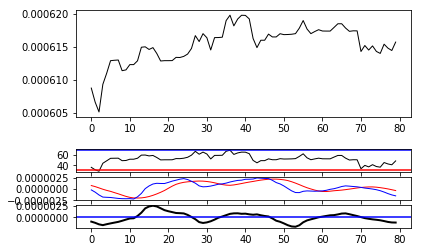

In [1]:
# Reference: https://kknews.cc/invest/pl2xyn8.html
'''
Summary
Instance Methods: The most common method type that are used w/ "self" parameter. Able to access data and properties unique to each instance.
Static Methods: Cannot access anything else in the class. Totally self-contained code.
Class Methods: Parameter w/ "cls" that can access limited methods in the class. Can modify class specific details.
Reference:
https://www.digitalocean.com/community/tutorials/understanding-class-inheritance-in-python-3
'''
import tushare as ts
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_finance as mpf 
import talib as tl

# 設 置起始日期
start_date ='2018-04-01' 
End_date = '2019-07-01'
# 導入數據 
df_300427 = ts.get_hist_data('300427',start=start_date,end=End_date) 
df_300427 = df_300427.sort_index() # Sort in ascend order of date

# 計算均線" 
sma_10 = tl.SMA(np.array(df_300427['close']), 10) 
# Calculate MACD

import numpy as np
import matplotlib.pyplot as plt



######   data


prices = np.array([ 0.00061422,  0.00061422,  0.00061593,  0.00061672,  0.0006161 ,
		0.00061233,  0.000615  ,  0.00061305,  0.00061346,  0.00061417,
		0.00061428,  0.00061418,  0.0006115 ,  0.00061203,  0.0006125 ,
		0.00061295,  0.00061296,  0.00061295,  0.00061242,  0.00061144,
		0.00060874,  0.00060661,  0.00060512,  0.00060931,  0.000611  ,
		0.0006129 ,  0.00061296,  0.000613  ,  0.00061138,  0.0006115 ,
		0.0006123 ,  0.0006123 ,  0.00061288,  0.00061494,  0.000615  ,
		0.0006146 ,  0.00061488,  0.00061399,  0.00061285,  0.0006129 ,
		0.0006129 ,  0.00061291,  0.0006134 ,  0.00061338,  0.00061355,
		0.0006139 ,  0.00061475,  0.0006167 ,  0.0006158 ,  0.000617  ,
		0.00061638,  0.00061452,  0.0006164 ,  0.00061641,  0.00061646,
		0.00061898,  0.0006198 ,  0.00061818,  0.00061922,  0.00061979,
		0.00061977,  0.00061924,  0.00061626,  0.00061488,  0.000616  ,
		0.000616  ,  0.00061693,  0.0006165 ,  0.0006165 ,  0.00061699,
		0.00061685,  0.00061687,  0.00061691,  0.000617  ,  0.00061784,
		0.00061899,  0.0006177 ,  0.000617  ,  0.00061732,  0.0006176 ,
		0.0006174 ,  0.00061739,  0.00061739,  0.00061794,  0.0006185 ,
		0.0006185 ,  0.00061785,  0.00061735,  0.00061743,  0.00061742,
		0.00061429,  0.0006152 ,  0.00061451,  0.00061514,  0.0006143 ,
		0.000614  ,  0.0006154 ,  0.0006148 ,  0.00061444,  0.00061572])


######   functions


def moving_average(x, n, type='simple'):
	"""
	compute an n period moving average.

	type is 'simple' | 'exponential'

	"""
	x = np.asarray(x)
	if type == 'simple':
		weights = np.ones(n)
	else:
		weights = np.exp(np.linspace(-1., 0., n))

	weights /= weights.sum()

	a = np.convolve(x, weights, mode='full')[:len(x)]
	a[:n] = a[n]
	return a


def relative_strength(prices, n=14):
	"""
	compute the n period relative strength indicator
	http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
	http://www.investopedia.com/terms/r/rsi.asp
	"""

	deltas = np.diff(prices)
	seed = deltas[:n+1]
	up = seed[seed >= 0].sum()/n
	down = -seed[seed < 0].sum()/n
	rs = up/down
	rsi = np.zeros_like(prices)
	rsi[:n] = 100. - 100./(1. + rs)

	for i in range(n, len(prices)):
		delta = deltas[i - 1]  # cause the diff is 1 shorter

		if delta > 0:
			upval = delta
			downval = 0.
		else:
			upval = 0.
			downval = -delta

		up = (up*(n - 1) + upval)/n
		down = (down*(n - 1) + downval)/n

		rs = up/down
		rsi[i] = 100. - 100./(1. + rs)

	return rsi


def moving_average_convergence(x, nslow=26, nfast=12):
	"""
	compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
	return value is emaslow, emafast, macd which are len(x) arrays
	"""
	emaslow = moving_average(x, nslow, type='exponential')
	emafast = moving_average(x, nfast, type='exponential')
	return emaslow, emafast, emafast - emaslow


######   code


nslow = 26
nfast = 12
nema = 9
emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
ema9 = moving_average(macd, nema, type='exponential')
rsi = relative_strength(prices)

wins = 80


plt.figure(1)

### prices

plt.subplot2grid((8, 1), (0, 0), rowspan = 4)
plt.plot(prices[-wins:], 'k', lw = 1)


### rsi

plt.subplot2grid((8, 1), (5, 0))
plt.plot(rsi[-wins:], color='black', lw=1)
plt.axhline(y=30,     color='red',   linestyle='-')
plt.axhline(y=70,     color='blue',  linestyle='-')


## MACD

plt.subplot2grid((8, 1), (6, 0))

plt.plot(ema9[-wins:], 'red', lw=1)
plt.plot(macd[-wins:], 'blue', lw=1)


plt.subplot2grid((8, 1), (7, 0))

plt.plot(macd[-wins:]-ema9[-wins:], 'k', lw = 2)
plt.axhline(y=0, color='b', linestyle='-')

plt.show()

In [12]:
# -*- coding: utf-8 -*-
# Reference:
# Technical analysis Indicators without Talib (code): https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
# 指標說明: https://www.ejfq.com/hkej_upload/guide/faq/jsp/faq_html5chart.jsp
# TA-Lib common functions library - TALIB: http://qtstalker.sourceforge.net/talib.html
#                                          https://mrjbq7.github.io/ta-lib/func_groups/volume_indicators.html
# Trading Strategy: Technical Analysis with Python TA-Lib:
#     https://towardsdatascience.com/trading-technical-analysis-with-pandas-43e737a17861
#     https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Ftrading-strategy-technical-analysis-with-python-ta-lib-3ce9d6ce5614
# Full technical desc for TA-LIB: https://mrjbq7.github.io/ta-lib/
# Python说：这个炒股指标KDJ是我见过最废的，没有之一: 
#           https://blog.csdn.net/xingbuxing_py/article/details/100152155
#           http://www.361way.com/talib-macd-kdj/6138.html
# 布林通道（Bollinger Bands，BBands）: https://zhuanlan.zhihu.com/p/43504390
# Matplotlib 蜡烛图教程: https://zhuanlan.zhihu.com/p/28584048
#                      https://zhuanlan.zhihu.com/p/29519040
# 有哪些你看了以后大呼过瘾的数据分析书？: https://www.zhihu.com/question/60241622 www.allitebooks.com
# Predict Stock Prices Using RNN: https://lilianweng.github.io/lil-log/2017/07/08/predict-stock-prices-using-RNN-part-1.html
# Example: https://github.com/happynoom/DeepTrade.git
#          https://github.com/HappyZ/dpt-tools/wiki/The-Ultimate-Rooting-Guide
#          https://medium.com/@silviachen_76118/setup-vim-with-python-in-ubuntu-18-04-4d85cc07d679
'''
# apt-get install vim-scripts
# apt-get install vim-addon-manager
# apt-get install exuberant-ctags
# vim-addons install taglist
# wget https://www.vim.org/scripts/download_script.php?src_id=21842
# unzip download_script.php\?src_id\=21842  in /usr/share/vim
# cp /usr/share/vim/vim80/vimrc_example.vim ~/.vimrc
# vim ~/.vimrc
let Tlist_Auto_Highlight_Tag=1
let Tlist_Auto_Open=1 
let Tlist_Auto_Update=1
let Tlist_Display_Tag_Scope=1 
let Tlist_Exit_OnlyWindow=1
let Tlist_Enable_Dold_Column=1 
let Tlist_File_Fold_Auto_Close=1
let Tlist_Show_One_File=1 
let Tlist_Use_Right_Window=1 
let Tlist_Use_SingleClick=1
nnoremap <silent> <F8> :TlistToggle<CR> // <F8> is taglist
 
filetype plugin on 
autocmd FileType python set omnifunc=pythoncomplete#Complete
autocmd FileType javascrīpt set omnifunc=javascriptcomplete#CompleteJS 
autocmd FileType html set omnifunc=htmlcomplete#CompleteTags 
autocmd FileType css set omnifunc=csscomplete#CompleteCSS
autocmd FileType xml set omnifunc=xmlcomplete#CompleteTags
autocmd FileType php set omnifunc=phpcomplete#CompletePHP
autocmd FileType c set omnifunc=ccomplete#Complete
 
let g:pydiction_location='~/.vim/tools/pydiction/complete-dict'

#cp /usr/share/vim/pydiction/after/ftplugin/python_pydiction.vim ~/.vim/after/ftplugin
#cp /usr/share/vim/pydiction/complete-dict ~/.vim/tools/pydiction/complete-dict

Trend Indicators
================
Reference: https://blog.quantinsti.com/indicators-build-trend-following-strategy/
* Moving Averages
* Bollinger Bands
* MACD (Moving Average Convergence Divergence): A refinement of the two moving averages system and measures the distance 
                                                between the two moving average lines.
* RSI (Relative Strength Index): Momentum oscillator generally used in sideways or ranging markets where 
                                 the price moves between support and resistance levels.
* OBV (On Balance Volume): On Balance Volume (OBV) actually measures buying and selling pressure on a cumulative 
                           basis which subtracts volume on down days and adds volume on up days. People often use OBV[2] 
                           to confirm price trend and also look for divergence between price and OBV.
                           This technical indicator that uses the "quantity" factor as a breakthrough to 
                           discover hot stocks and analyze stock price movement trends.
Stochastics (George Lane) are range-based indicators, 
the Relative Strength Index (Welles Wilder) is an overbought/oversold indicator,
and Moving Average Convergence Divergence (Gerald Appel) is a trend indicator.
'''

import tushare as ts 
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_finance as mpf 
import talib
import pandas
import matplotlib.dates as mdates
from matplotlib.pylab import date2num
import datetime
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
# "設置起始日期" 
Start_date = '2019-10-01' 
End_date   = '2019-12-31'
# "導入數據" 
df_300427 = ts.get_k_data('300427', start = Start_date, end = End_date, ktype = 'D') 
df_300427 = df_300427.sort_index() # Index on date in ascend order
# print(df_300427.tail(10))
# print(df_300427[:3])
# print(df_300427.info()) # Verify the read out data index
# print(df_300427.shape) Find out how many transaction days for a specified time period

# "計算均線"
# 0: SMA (simple)
# 1: EMA (exponential)
# 2: WMA (weighted)
# 3: DEMA (double exponential)
# 4: TEMA (triple exponential)
# 5: TRIMA (triangular)
# 6: KAMA (Kaufman adaptive)
# 7: MAMA (Mesa adaptive)
# 8: T3 (triple exponential T3)
sma_5  = talib.MA(np.array(df_300427['close']), timeperiod = 5,  matype = 1)
sma_10 = talib.MA(np.array(df_300427['close']), timeperiod = 10, matype = 1)
sma_15 = talib.MA(np.array(df_300427['close']), timeperiod = 15, matype = 1)

macd, macdSignal, macdHist = talib.MACD(np.array(df_300427['close']),
                            fastperiod = 5, slowperiod = 12, signalperiod = 9)  
rsi = talib.RSI(np.array(df_300427['close']), timeperiod = 5)     #RSI的天数一般是6、12、24
mom = talib.MOM(np.array(df_300427['close']), timeperiod = 5)

# Bollinger Bands: Help to judge the derivation between current price and the price's normal distribution model
# So if mid is NOT equal to the current price, so there will be high possibility to adjust back.
up, mid, low = talib.BBANDS(np.array(df_300427['close']), timeperiod=5, nbdevup=2, nbdevdn=2, matype=4)

# Accumulation/Distribution Line: Combines price and volume to show how money may be flowing into or out of a stock.
# %B Indicator: Shows the relationship between price and standard deviation Bollinger Bands. Similar to MACD vs BBANDS?
# On Balance Volume (OBV): Combines price and volume in a very simple way to show how money may be flowing into or out of a stock.
ad  = talib.AD(df_300427['high'], df_300427['low'], df_300427['close'], df_300427['volume']).values
adosc = talib.ADOSC(df_300427['high'], df_300427['low'], df_300427['close'], df_300427['volume'], fastperiod=3, slowperiod=10).values
obv = talib.OBV(df_300427['close'], df_300427['volume']).values
# print(ad.__class__) Check type of the return obj for plot processing
# print(df_300427['volume'].max())
# print(df_300427['volume'].min())

print('df_300427 shape: ', df_300427.shape, 'bband: ', mid.size, ', sma_5: ', sma_5.size, ', rsi: ', rsi.size, ', obv: ', obv.size, ', macd: ', macd.size, 'macd singnal size: ', macdSignal.size)
# Reference:
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

'''
Enumerate to find out the candidate
'''

for indexNb in range (0, df_300427.shape[0]):
    rowStock = df_300427.iloc[indexNb]
    if (indexNb < 6):
        continue
    if  ((mid[indexNb] > mid[indexNb - 1]) and
        (sma_5[indexNb] > sma_5[indexNb - 1]) and
        (mid[indexNb] > sma_5[indexNb - 1]) and
        (rsi[indexNb] > rsi[indexNb -1]) and
        (obv[indexNb] > obv[indexNb - 1]) and
        (macd[indexNb] > macdSignal[indexNb])):
            # Add into Buy Candidate
            print("IndexNb: ", indexNb, " Record: ", rowStock)
            print("Next CLOSE value: ", df_300427.iloc[indexNb + 1, 'close'])
            
fig2, host = plt.subplots(1, 1, figsize = (30, 20), sharex = True)

par1 = host.twinx() # par1 for Volume
par2 = host.twinx() # par2 for MA5
par3 = host.twinx() # par3 for BBANDS
par4 = host.twinx() # par4 for MACD
par5 = host.twinx() # par5 for RSI
par6 = host.twinx() # par6 for OBV

par2.spines["right"].set_position(("axes", 1.05))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

par3.spines["right"].set_position(("axes", 1.10))
make_patch_spines_invisible(par3)
par3.spines["right"].set_visible(True)

par4.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par4)
par4.spines["right"].set_visible(True)

par5.spines["right"].set_position(("axes", 1.20))
make_patch_spines_invisible(par5)
par5.spines["right"].set_visible(True)

par6.spines["right"].set_position(("axes", 1.25))
make_patch_spines_invisible(par6)
par6.spines["right"].set_visible(True)

host.grid(True)
host.set_xticks(range(0, len(df_300427['date']), 10))
host.set_xticklabels(df_300427['date'][::10])
mpf.candlestick2_ochl(host, df_300427['open'], df_300427['close'], df_300427['high'],df_300427['low'], width=0.6, colorup='r', colordown='g', alpha=0.75) 
mpf.volume_overlay(par1, df_300427['open'], df_300427['close'], df_300427['volume'], colorup='r', colordown='g', width=0.6, alpha=0.8) 
par1.set_ylabel('Volume')

host.set_ylim(df_300427['low'].min(), df_300427['high'].max())
par1.set_ylim(df_300427['volume'].min(), df_300427['volume'].max())
par2.set_ylim(np.nanmin(sma_5), np.nanmax(sma_5))
par3.set_ylim(np.nanmin(low), np.nanmax(up))
par4.set_ylim(np.nanmin(macd), np.nanmax(macd))
par5.set_ylim(np.nanmin(rsi), np.nanmax(rsi))
par6.set_ylim(np.nanmin(obv), np.nanmax(obv))

host.set_xlabel("Date")
host.set_ylabel("Price")
par1.set_ylabel("Volume")
par2.set_ylabel("MA5")
par3.set_ylabel("BBANDS")
par4.set_ylabel("MACD")
par5.set_ylabel("RSI")
par6.set_ylabel("OBV")

par2.plot(sma_5, color = 'blue', linewidth = 2.0, label="MA5")

# par3.plot(up,  label = "BBAND HIGH")
par3.plot(mid, color = 'green', linewidth = 2.0, label = "BBAND MID")
# par3.plot(low, linewidth = 2.5, label = "BBAND LOW")
'''
Temporary turn off display
par4.plot(macd, color = 'cyan', linewidth = 2.0, label = 'MACD')
'''
par5.plot(rsi, color = 'red', linewidth = 2.0, label = "RSI")

par6.plot(obv, color = 'black', linewidth = 2.0, label = "OBV")

lines_labels = [ax.get_legend_handles_labels() for ax in fig2.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig2.legend(lines, labels, loc = 'upper center', ncol = 5)
fig2.savefig("Complex-1.pdf")
# -------------------------------
# Separate Diagram
# -------------------------------
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (20,30), sharex = True) 
fig.subplots_adjust(hspace=0)  # Decrease the gap between subplot to be 0
ax1.grid(True)
ax1.set_xticks(range(0, len(df_300427['date']), 10))
ax1.set_xticklabels(df_300427['date'][::10])
mpf.candlestick2_ochl(ax1, df_300427['open'], df_300427['close'], df_300427['high'],df_300427['low'], width=0.6, colorup='r', colordown='g', alpha=0.75) 
mpf.volume_overlay(ax2, df_300427['open'], df_300427['close'], df_300427['volume'], colorup='r', colordown='g', width=0.6, alpha=0.8) 

ax1.plot(sma_5,  label='MA5')
# ax1.plot(sma_10, label='MA10') 
# ax1.plot(sma_15, label='MA15') 
ax1.plot(up, label = "BBAND HIGH")
ax1.plot(mid, label = "BBAND MID")
ax1.plot(low, label = "BBAND LOW")
ax1.legend() 

ax2.grid(True) 

print("移动平均可抚平短期波动，反映出长期趋势或周期。5天和10天的短期移动平均线。是短线操作的参照指标，称做日均线指标。")
print("当MACD从负数转向正数，是买的信号。当MACD从正数转向负数，是卖的信号。\
当MACD以大角度变化，表示快的移动平均线和慢的移动平均线的差距非常迅速的拉开，代表了一个市场大趋势的转变。")
print("当RSI >= 75时(视为超买，是卖出的时候)。当RSI <= 25时(视为超卖，是买入的时候)。")
print("累积/派发线通过成交量来确认价格趋势，对于可能导致价格波动反转的弱趋势给出预警。")
ax3.plot(macd, label = 'MACD')
ax3.plot(macdSignal, label = 'MACD Signal')
ax3.plot(macdHist, label = 'MACD History')
ax3.legend()
ax3.grid(True)

ax4.plot(ad, label = 'Accumulation Distribution')
# ax4.plot(adosc, label = 'Chaikin A/D Oscillator')
ax4.plot(obv, label = 'On Balance Volume')
ax4.legend()
ax4.grid()

ax5.plot(rsi, label = 'RSI')
ax5.plot(mom, label = 'Momentum')
ax5.legend()
ax5.grid()
plt.show()
fig.savefig("Complex-2.pdf")

('df_300427 shape: ', (61, 7), 'bband: ', 61, ', sma_5: ', 61, ', rsi: ', 61, ', obv: ', 61, ', macd: ', 61, 'macd singnal size: ', 61)
('IndexNb: ', 39, ' Record: ', date      2019-12-02
open           12.02
close          12.18
high           12.29
low            11.93
volume         28191
code          300427
Name: 222, dtype: object)


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types